# Example LnL Computation


In [1]:
from lnl_computer.cosmic_integration.mcz_grid import McZGrid
from lnl_computer.cosmic_integration.star_formation_paramters import DEFAULT_DICT, draw_star_formation_samples
from lnl_computer.observation.mock_observation import MockObservation
from compas_python_utils.cosmic_integration.binned_cosmic_integrator.bbh_population import \
    generate_mock_bbh_population_file
from collections import namedtuple
import os
from tqdm.auto import tqdm
import warnings

warnings.filterwarnings("ignore")

lnl_computer | 03/12/24 15:16:19 | INFO | source-path: /Users/avaj0001/Documents/projects/compas_dev/COSMIC_INT/lnl_computer/src/lnl_computer


In [2]:
MOCK_DATA_TYPE = namedtuple('MockData', ['compas_h5_path', 'obs', 'duration', 'sf_sample'])


def generate_mock_data(tmpdir='out_temp', n_systems=2000):
    os.makedirs(tmpdir, exist_ok=True)
    DURATION = 5
    mock_compas_h5 = generate_mock_bbh_population_file(
        n_systems=int(n_systems), filename=f"{tmpdir}/mock_compas.h5",
    )
    mock_obs = MockObservation.from_compas_h5(mock_compas_h5, duration=DURATION, cosmological_parameters=DEFAULT_DICT)
    return MOCK_DATA_TYPE(mock_compas_h5, mock_obs, DURATION, DEFAULT_DICT)


MOCK_DATA = generate_mock_data()

Computing detection rates:   0%|          | 0/1381 [00:00<?, ?it/s]

lnl_computer | 03/12/24 15:16:29 | INFO | Sampling 140987.7 events (5yrs) from mcz_grid[<mcz_grid: [1983 systems], aSF_0.0100000000_dSF_4.7000000000_mu_z_-0.2300000000_sigma_0_0.3900000000, [/Users/avaj0001/Documents/projects/compas_dev/COSMIC_INT/lnl_computer/docs/out_temp/mock_compas.h5]>]


In [3]:
import matplotlib.pyplot as plt

DURATION = 2
PATH = '/home/avaj040/Documents/projects/COSMIC_INTEGRATOR/pipeline/data/Z_all/COMPAS_Output.h5'
MOCK_DATA = MockObservation.from_compas_h5(PATH, duration=DURATION, cosmological_parameters=DEFAULT_DICT)

def plot_lnls(param, values, lnls):
    plt.figure()
    plt.plot(values, lnls, 'o')
    ylim = plt.ylim()
    plt.vlines(MOCK_DATA.sf_sample[param], *ylim, colors='red', linestyles='dashed')
    plt.ylim(ylim)
    plt.xlabel(param)
    plt.ylabel('lnL')

def compute_lnls_for_param(obs, param='mu_z', n_samples=10, ):
    lnls = []
    lnl_kwgs = dict(
        mcz_obs=obs,
        duration=MOCK_DATA.duration,
        compas_h5_path=MOCK_DATA.compas_h5_path,
        save_plots=True
    )
    samples = draw_star_formation_samples(n_samples, parameters=param, grid=True, as_list=True)
    for sf_sample in samples:
        lnl, _ = McZGrid.lnl(sf_sample=sf_sample, **lnl_kwgs)
        lnls.append(lnl)
    s = [list(sf_sample.values())[0] for sf_sample in samples]
    return s, lnls




FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/home/avaj040/Documents/projects/COSMIC_INTEGRATOR/pipeline/data/Z_all/COMPAS_Output.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
N = 10
sigma0s, sigma0_lnls = compute_lnls_for_param(MOCK_DATA.obs, 'sigma_0', N)
muzs, muz_lnls = compute_lnls_for_param(MOCK_DATA.obs, 'mu_z', N)
aSFs, aSF_lnls = compute_lnls_for_param(MOCK_DATA.obs, 'aSF', N)
dSFs, dSF_lnls = compute_lnls_for_param(MOCK_DATA.obs, 'dSF', N)

AttributeError: 'MockObservation' object has no attribute 'obs'

In [ ]:
plot_lnls('sigma_0', sigma0s, sigma0_lnls)
plot_lnls('mu_z', muzs, muz_lnls)
plot_lnls('aSF', aSFs, aSF_lnls)
plot_lnls('dSF', dSFs, dSF_lnls)


In [ ]:
from lnl_computer.observation import load_observation


lvk_obs = load_observation('LVK') 

N = 10
sigma0s, lvk_sigma0_lnls = compute_lnls_for_param(lvk_obs, 'sigma_0', N)
muzs, lvk_muz_lnls = compute_lnls_for_param(lvk_obs, 'mu_z', N)
aSFs, lvk_aSF_lnls = compute_lnls_for_param(lvk_obs, 'aSF', N)
dSFs, lvk_dSF_lnls = compute_lnls_for_param(lvk_obs, 'dSF', N)

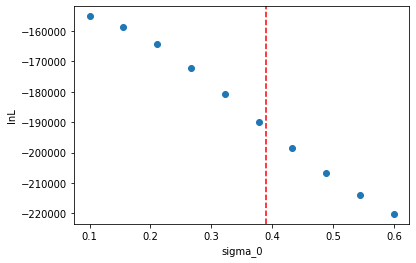

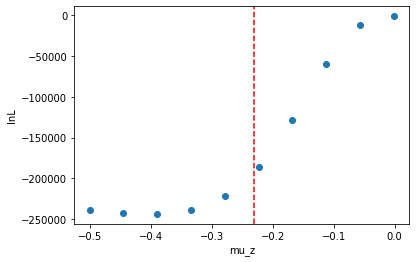

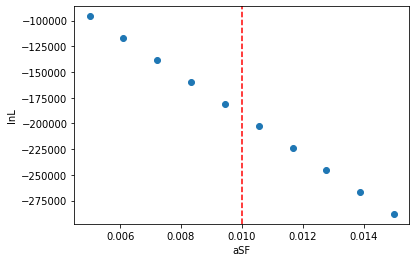

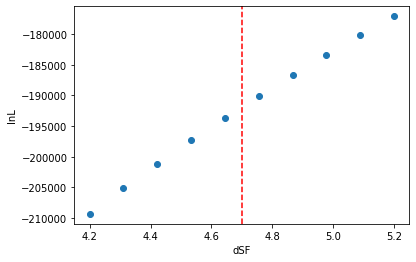

In [6]:
plot_lnls('sigma_0', sigma0s, lvk_sigma0_lnls)
plot_lnls('mu_z', muzs, lvk_muz_lnls)
plot_lnls('aSF', aSFs, lvk_aSF_lnls)
plot_lnls('dSF', dSFs, lvk_dSF_lnls)
